1. Comment where cell is droping categorical columns
2. Run -> get error 
3. Now introduce one hot encoding (importance of numerical data)

# STEP 1: Importing the required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 


# STEP 2: Loading the Data

In [2]:
df = pd.read_csv('cleanedData.csv')

In [3]:
df.shape #number of rows and columns

(19395, 9)

In [4]:
df.head(5) #Display first five samples in dataframe

,Brand,Condition,Fuel,Distance,Model,Price,Registered_City,Transaction_Type,Year
0,Suzuki,Used,CNG,2.0,Mehran VX,200000.0,Karachi,Cash,1993.0
1,Toyota,Used,Petrol,117000.0,Corolla GLI,1465000.0,Karachi,Cash,2012.0
2,Honda,Used,Petrol,120000.0,Civic VTi Oriel Prosmatec,950000.0,Karachi,Cash,2006.0
3,Toyota,Used,Petrol,77272.0,Prius,1900000.0,Karachi,Cash,2011.0
4,Toyota,Used,Petrol,44000.0,Corrolla Altis,2100000.0,Karachi,Cash,2015.0


In [5]:
# Basic02: Comment this cell
# df = df.drop(['Brand', 'Condition', 'Fuel', 'Model', 'Registered_City', 'Transaction_Type'], axis=1)

In [6]:
# Basic02: Comment this cell
# df.head(5) #Display first five samples in dataframe

Basic02: introduce
# STEP 3: Data Preprocessing

In [7]:
#Basic02
#One hot encoding
df=pd.get_dummies(df,drop_first=True)

In [8]:
df.head()

,Distance,Price,Year,Brand_BMW,Brand_Changan,Brand_Chevrolet,Brand_Classic & Antiques,Brand_Daewoo,Brand_Daihatsu,Brand_FAW,...,Registered_City_Sargodha,Registered_City_Sheikhüpura,Registered_City_Sialkot,Registered_City_Sukkar,Registered_City_Sukkur,Registered_City_Swabi,Registered_City_Tank,Registered_City_Vehari,Registered_City_Wah,Transaction_Type_Installment/Leasing
0,2.0,200000.0,1993.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,117000.0,1465000.0,2012.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120000.0,950000.0,2006.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77272.0,1900000.0,2011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44000.0,2100000.0,2015.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


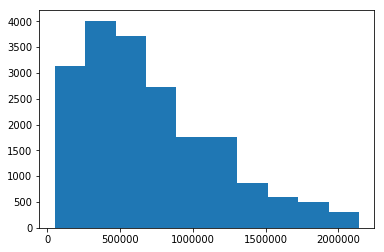

In [9]:
plt.hist(df['Price'])
plt.show()

# STEP 3: Divide the data into training and test data

In [10]:
df_y = df['Price'].values
df_X = df.drop(['Price'], axis=1)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
test_size = 0.30

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_y, test_size=test_size, random_state = 3)


# STEP 4: Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [14]:
regr = LinearRegression()

In [15]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Comparison of first five predicted and actual price in train_set

In [16]:
y_pred = regr.predict(X_train)

In [17]:
#creating a dataframe
out = pd.DataFrame({'Actual': Y_train.flatten(), 'Predicted': y_pred.flatten()})

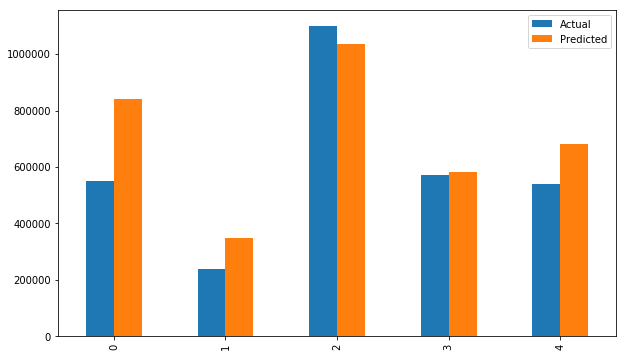

In [18]:
#Basic01
# Plot outputs
out = out.head(5)
out.plot(kind='bar',figsize=(10,6))
plt.show()

In [19]:
y_pred = regr.predict(X_test)

In [20]:
#creating a dataframe
out = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})

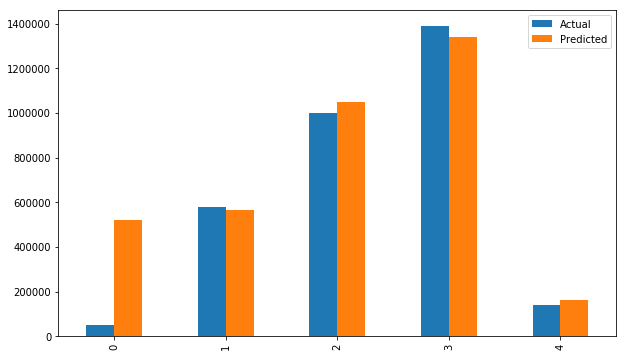

In [21]:
#Basic01
# Plot outputs
out = out.head(5)
out.plot(kind='bar',figsize=(10,6))
plt.show()